# Aprendizaje No-Supervisado en Python
- Ingeniería de variables (Feature engineering)
- Centroid-based Clustering (K-Means , Mean-Shift & Mini-Batch K-Means)
- Density-based clustering (DBSCAN, OPTICS)
- Distribution-based clustering (GMM)
- Hierarchical clustering (Agglomerative Clustering)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/UCL_equipos_2004_2024.csv')
df.set_index('Squad', inplace=True)

# copia donde vamos a guardar los clusters
df_0 = df.copy()

## 1.- Ingeniería de variables


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
col_num = ['Titulos','Participaciones',
           'W_t','D_t','L_t','GF_t','GA_t','GD_t',
           'Pts_t','Stage_pts_t']

df_1 = df[col_num]

Estandarizar variables numéricas

In [5]:
scaler = StandardScaler()
df_1_est = scaler.fit_transform(df_1)

Reducción a 2 componentes principales para visualización y clustering

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_1_est)

## 2.- Centroid-based Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth


In [8]:
df_pca = df_pca.copy()

### 2.1 K-Means 
Este método asigna puntos a k grupos basándose en su proximidad al centroide de cada grupo. Los centroides se recalculan después de cada iteración hasta que la posición de los centroides ya no cambia significativamente.

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_pca)

c:\Users\velir\anaconda3\envs\IA_UCL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
df_0['Cluster_Kmeans'] = clusters_kmeans
df_0['Cluster_Kmeans'].value_counts()

Cluster_Kmeans
1    81
0    32
2    10
Name: count, dtype: int64

Visualización en el espacio de componentes principales

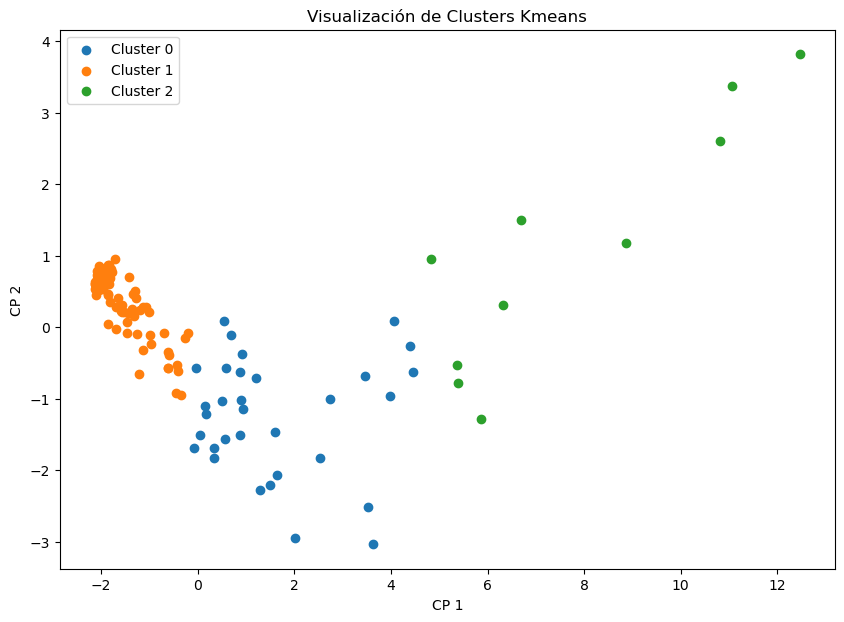

In [11]:
plt.figure(figsize=(10, 7))

for i in range(0, 3):
    plt.scatter(df_pca[df_0['Cluster_Kmeans'] == i, 0], df_pca[df_0['Cluster_Kmeans'] == i, 1], label=f'Cluster {i}')

plt.title('Visualización de Clusters Kmeans')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()
plt.show()


In [12]:
df_c0 = df_0[df_0['Cluster_Kmeans'] == 0].drop('Cluster_Kmeans', axis=1)
df_c1 = df_0[df_0['Cluster_Kmeans'] == 1].drop('Cluster_Kmeans', axis=1)
df_c2 = df_0[df_0['Cluster_Kmeans'] == 2].drop('Cluster_Kmeans', axis=1)

In [13]:
print('CLUSTER 0 -----------------')
print(df_c0.describe().loc['mean'])
print()

print('CLUSTER 1 -----------------')
print(df_c1.describe().loc['mean'])
print()

print('CLUSTER 2 -----------------')
print(df_c2.describe().loc['mean'])
print()

CLUSTER 0 -----------------
Participaciones      9.59375
W_t                 28.96875
D_t                 18.87500
L_t                 30.46875
GF_t               107.00000
GA_t               109.59375
GD_t                -2.59375
Pts_t              105.78125
Stage_pts_t         11.62500
Titulos              0.06250
Name: mean, dtype: float64

CLUSTER 1 -----------------
Participaciones     2.074074
W_t                 4.629630
D_t                 4.567901
L_t                 7.777778
GF_t               19.296296
GA_t               27.592593
GD_t               -8.296296
Pts_t              18.456790
Stage_pts_t         1.012346
Titulos             0.000000
Name: mean, dtype: float64

CLUSTER 2 -----------------
Participaciones     16.5
W_t                 89.3
D_t                 39.6
L_t                 36.8
GF_t               305.8
GA_t               164.6
GD_t               141.2
Pts_t              307.5
Stage_pts_t         48.6
Titulos              1.8
Name: mean, dtype: float64



**Cluster 0: EQUIPOS MEDIANAMENTE EXITOSOS**  
Este grupo incluye equipos con un número relativamente alto de participaciones (promedio de 12) y un desempeño moderado en términos de partidos ganados (29 victorias de media). Aunque estos equipos han sido competitivos, con más de 107 goles a favor en promedio, su número de títulos ganados es bajo (0.06), lo que sugiere que son equipos regulares en la competición pero con menos éxito en términos de títulos.

**Cluster 1: EQUIPOS MENOS EXITOSOS**  
Representa equipos con una menor cantidad de participaciones (promedio de 2) y un desempeño general más bajo en la competición, con alrededor de 5 victorias de media y 19 goles a favor. Estos equipos no han ganado títulos y tienen una diferencia de goles negativa (-8).

**Cluster 2: EQUIPOS MÁS EXITOSOS**  
Este cluster agrupa a los equipos más exitosos, con un promedio muy alto de participaciones (17), victorias (90), y un número significativo de títulos ganados (1.8). Con 306 goles a favor de media y una diferencia de goles positiva impresionante (141), estos equipos son los gigantes del fútbol europeo, consistentemente dominando la competición.

### 2.2 Mean-Shift
A diferencia de K-Means, Mean-Shift no requiere especificar el número de grupos a priori. Este algoritmo encuentra los centroides desplazándose hacia la máxima densidad de puntos en una región, basándose en una función de densidad estimada. El proceso converge hacia los picos de densidad, y cada punto se asigna al pico más cercano.

In [14]:
# estimamos el ancho de banda necesario
bandwidth = estimate_bandwidth(df_pca, quantile=0.2, n_samples=500)
print(bandwidth)

# aplicamos el algoritmo MeanShift
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
clusters_ms = mean_shift.fit_predict(df_pca)

1.397445385720089


In [15]:
df_0['Cluster_MS'] = clusters_ms
num_clusters_ms = len(np.unique(clusters_ms))
df_0['Cluster_MS'].value_counts()

Cluster_MS
0    70
1    29
2     7
3     7
4     3
6     3
5     2
7     1
8     1
Name: count, dtype: int64

Visualización

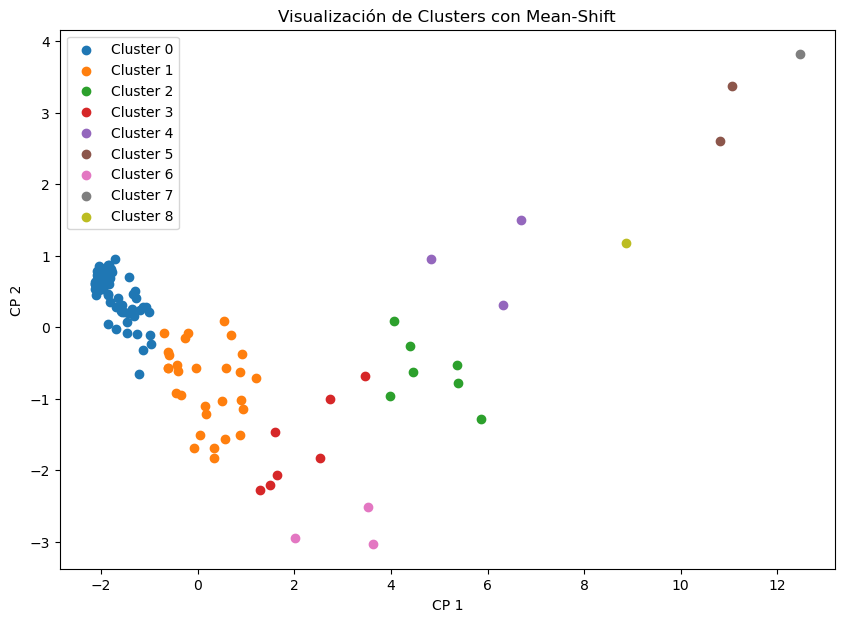

In [16]:
plt.figure(figsize=(10, 7))

for i in range(num_clusters_ms):
    plt.scatter(df_pca[df_0['Cluster_MS'] == i, 0], df_pca[df_0['Cluster_MS'] == i, 1], label=f'Cluster {i}')

plt.title('Visualización de Clusters con Mean-Shift')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()
plt.show()

Al haber analizado los datos, se ha considerado que el ancho de banda óptimo era de 1.39. Esto ha permitido identificar 9 clusters, que representan diferentes niveles de éxito en la competición. De hecho, para los clusters con menos equipos, podemos identificar claramente cuáles son:
- Cluster 7: es el Real Madrid
- Cluster 5: son el FC Barceloa y el Bayern Munich
- Cluster 8: es el Chelsea

A raíz de esto podemos interpretar que las componenetes principales son:
- CP1: la que tiene mayor variación entre los equipos, seguramente relacionada con el número de títulos, número de victorias...
- CP2: refleja otra dimensión de la variación, seguramente relacionada con el número de partidos jugados, diferencia de goles...

## 3.- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
Este algoritmo forma clústeres basándose en áreas de alta densidad. Los puntos que están estrechamente agrupados se consideran parte de un clúster, mientras que los puntos en áreas de baja densidad son marcados como anomalías o ruido.

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
                # distnacia máxima 0.5
                # minimo de puntos para hacer un cluster 4
clusters_dbscan = dbscan.fit_predict(df_pca)

In [19]:
df_0['Cluster_DBSCAN'] = clusters_dbscan

df_pca_clust = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_clust['Cluster_DBSCAN'] = clusters_dbscan

df_pca_clust['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 0    82
-1    24
 1    17
Name: count, dtype: int64

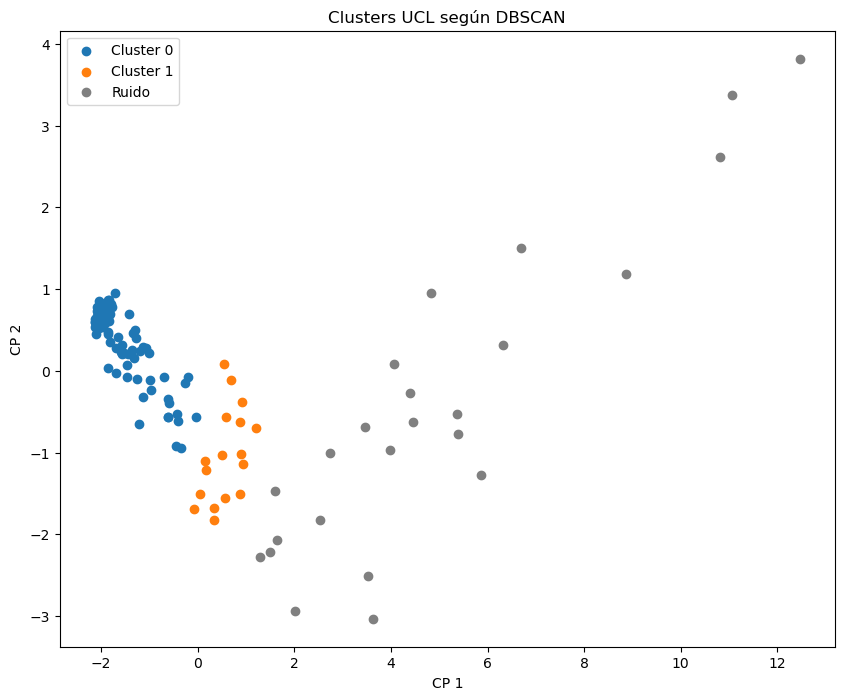

In [20]:
plt.figure(figsize=(10, 8))

# Plot points with cluster assignment
clusters_unique = set(clusters_dbscan)
for cluster in clusters_unique:
    if cluster == -1:
        # Plot noise in grey
        plt.scatter(df_pca_clust[df_pca_clust['Cluster_DBSCAN'] == cluster]['PCA1'],
                    df_pca_clust[df_pca_clust['Cluster_DBSCAN'] == cluster]['PCA2'],
                    color='grey', label='Ruido')
    else:
        # Plot clusters with different colors
        plt.scatter(df_pca_clust[df_pca_clust['Cluster_DBSCAN'] == cluster]['PCA1'],
                    df_pca_clust[df_pca_clust['Cluster_DBSCAN'] == cluster]['PCA2'],
                    label=f'Cluster {cluster}')

plt.title('Clusters UCL según DBSCAN')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()

Como consecuencia de los parámetros elegidos para considerar clusters (distancia max 0.5 y min muestras 4), se han identificado 2 clusters:
- Cluster 0 (82 equipos) : de los equipos menos exitosos
- Cluster 1 (17 equipos) : de los equipos medianamente exitosos

El resto de puntos se han considerado como ruido, ya que no están los suficientemente condensados para formar un cluster. Son considerados casos aislados según este modelo.

## 4.- Distribution-based clustering : Gaussian Mixture Model (GMM)
En este enfoque, el modelo asume que los datos están generados por la combinación de varias distribuciones gaussianas, cada una asociada con un grupo o clúster diferente. El objetivo del algoritmo es estimar los parámetros de estas distribuciones gaussianas y determinar la probabilidad de que un punto de datos pertenezca a cada una de las distribuciones. Con esta información, el algoritmo puede asignar cada punto de datos a uno de los clústeres.

In [21]:
from sklearn.mixture import GaussianMixture

In [22]:
gm = GaussianMixture(n_components=5, random_state=0)
gm.fit(df_pca)

# prediccion de clusters
clusters_gm = gm.predict(df_pca)

c:\Users\velir\anaconda3\envs\IA_UCL\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
df_0['Cluster_GMM'] = clusters_gm
num_clust_gm = len(np.unique(clusters_gm))
df_0['Cluster_GMM'].value_counts()

Cluster_GMM
1    66
0    34
3    12
4     7
2     4
Name: count, dtype: int64

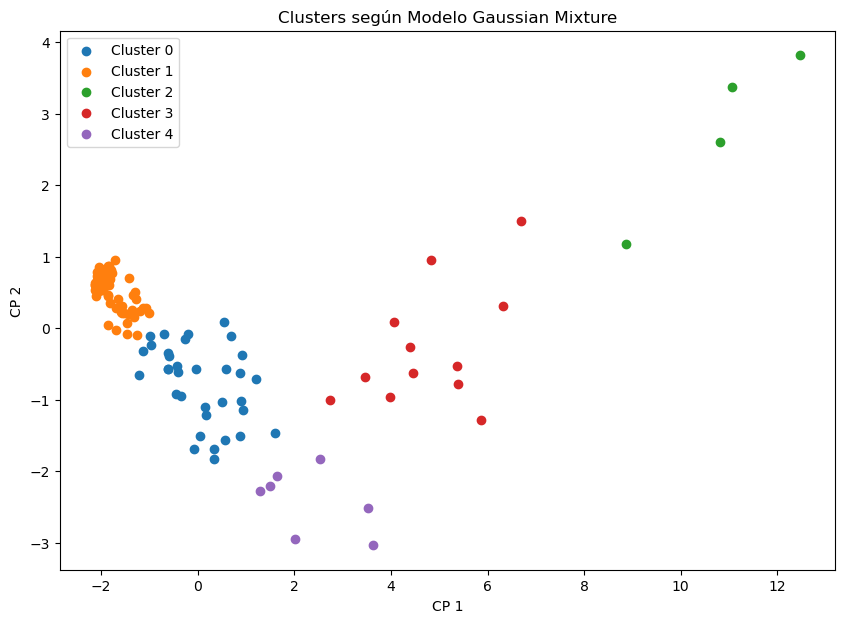

In [24]:
plt.figure(figsize=(10, 7))

for i in range(0, num_clust_gm):
    plt.scatter(df_pca[df_0['Cluster_GMM'] == i, 0], df_pca[df_0['Cluster_GMM'] == i, 1], label=f'Cluster {i}')

plt.title('Clusters según Modelo Gaussian Mixture')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()
plt.show()

El modelo GaussianMixture ha identificado 5 clusters, que representan grupos distintos en los datos con base en las distribuciones gaussianas, no sólo por su distancia "física" respecto a los puntos de alrededor. 

## 5.- Hierarchical clustering: Agglomerative Clustering
Este es un enfoque jerárquico que trata, en un principio, a cada punto de datos como un clúster individual  y luego los fusiona iterativamente basándose en medidas de similitud. 

In [25]:
from sklearn.cluster import AgglomerativeClustering

Vamos a imporner que el número de clusters sea 3.

In [36]:
agglo = AgglomerativeClustering(n_clusters=3, distance_threshold=None)
                    # numero de clusters = 3
                    # affinity = 'euclidean' (default)s
clusters_agglo = agglo.fit_predict(df_pca)

In [37]:
df_0['Cluster_Agglo'] = clusters_agglo
num_clust_agglo = len(np.unique(clusters_agglo))
df_0['Cluster_Agglo'].value_counts()

Cluster_Agglo
2    66
1    42
0    15
Name: count, dtype: int64

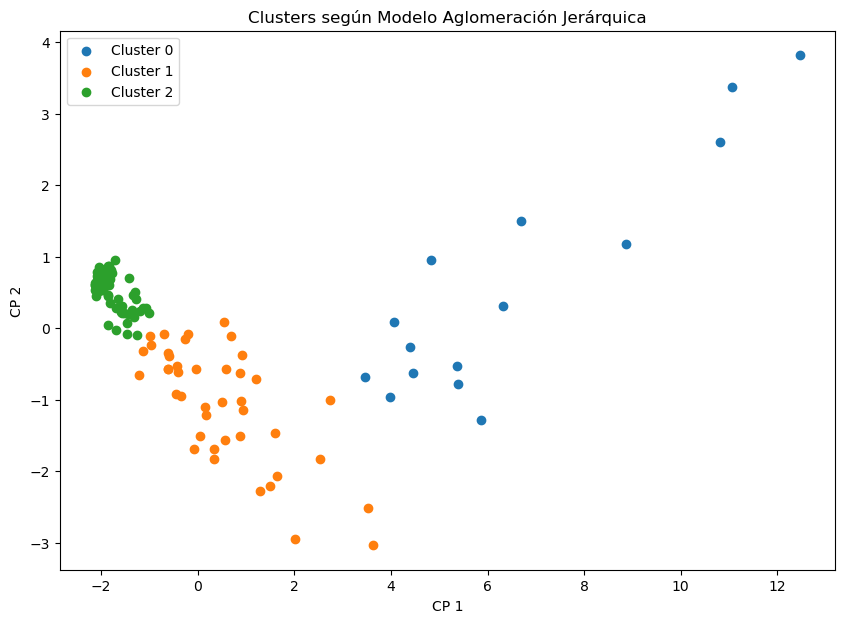

In [38]:
plt.figure(figsize=(10, 7))

for i in range(0, num_clust_agglo):
    plt.scatter(df_pca[df_0['Cluster_Agglo'] == i, 0], df_pca[df_0['Cluster_Agglo'] == i, 1], label=f'Cluster {i}')

plt.title('Clusters según Modelo Aglomeración Jerárquica')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()
plt.show()

A diferencia del K-Means (que también impusimos 3 clusters), este modelo se centra más en la similitud de los datos uno a uno, y no sólo en la distancia entre los centroides. Por tanto, los resultados podrían considerarse más fiablles en términos de la similitud de características entre los equipos.